In [2]:
dataset=[
    ['사과','치즈','생수'],
    ['생수','호두','치즈','고등어'],
    ['수박','사과','생수'],
    ['생수','호두','치즈','옥수수']
]

In [7]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# 트랜잭션 자료형으로 변환
# x축 전체 품목, y축 거래 아이디(영수증 한 장)
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)
df=pd.DataFrame(te_ary, columns=te.columns_) # 데이터프레임으로 변환
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [4]:
# 선험적 알고리즘  support>0.5 이상
from mlxtend.frequent_patterns import apriori

frequent_itemsets=apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets
# 사과를 살 확률은 0.5
# 치즈, 생수를 같이 살 확률은 75%

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(생수, 사과)"
5,0.75,"(치즈, 생수)"
6,0.50,"(생수, 호두)"
7,0.50,"(치즈, 호두)"
8,0.50,"(치즈, 생수, 호두)"


In [5]:
# confidence > 0.3 (디폴트 0.8)
from mlxtend.frequent_patterns import association_rules

rules=association_rules(frequent_itemsets, metric='confidence', min_threshold=.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
1,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
2,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
3,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
4,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
7,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
8,"(치즈, 생수)",(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
9,"(치즈, 호두)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf


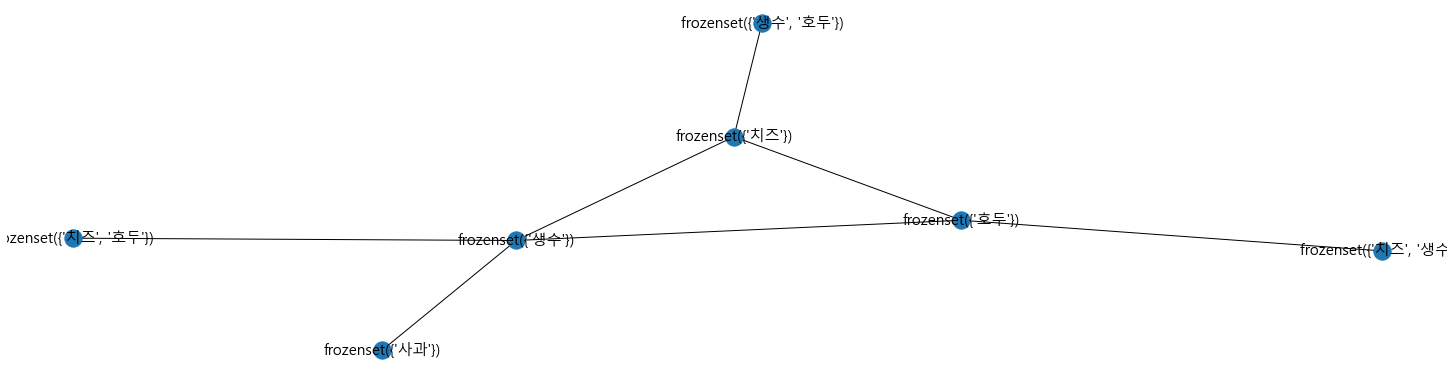

In [6]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import networkx as nx

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

ga=nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
# antecedents : 선행(~라면), consequents : 결과(~이다)
plt.figure(figsize=(20,5))
nx.draw(ga, with_labels=True, font_family=font_name, font_size=15)
# source(그래프의 안쪽 노드들), target(그래프의 바깥쪽 노드들)